In [38]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier, plot_importance

In [20]:
data_files_list = ['result_bus_20240226-112104.csv', 'result_passenger_20240226-112405.csv', 'result_taxi_20240226-112648.csv', 'result_truck_20240226-112812.csv']

In [21]:
train_dataset = pd.DataFrame()
test_dataset = pd.DataFrame()

for data_file in data_files_list:
    data = pd.read_csv('analysis_data' + os.sep + data_file)
    train_data, test_data = train_test_split(data, test_size=0.1, random_state=0)
    train_dataset = pd.concat([train_dataset, train_data])
    test_dataset = pd.concat([test_dataset, test_data])
    
train_dataset.drop(columns=['Unnamed: 0'], inplace=True)
test_dataset.drop(columns=['Unnamed: 0'], inplace=True)

data_columns = train_dataset.columns.to_list()[0:]
train_dataset.reset_index(inplace=True, drop=True)
test_dataset.reset_index(inplace=True, drop=True)

In [22]:
train_dataset.head()

,file_name,face_pt1_x_pos,face_pt1_y_pos,face_pt2_x_pos,face_pt2_y_pos,left_eye_pt1_x_pos,left_eye_pt1_y_pos,left_eye_pt2_x_pos,left_eye_pt2_y_pos,right_eye_pt1_x_pos,...,target_right_eye_pt1_y_pos,target_right_eye_pt2_x,target_right_eye_pt2_y_pos,exist_mask,exist_glasses,face_visible,left_eye_visible,left_eye_opened,right_eye_visible,right_eye_opened
0,R_234_60_M_19_M1_G1_C0_03.jpg,211.0,434.0,483.0,910.0,261.0,599.0,304.0,610.0,377.0,...,587.82,425.23,616.64,1,1,1,1,1,1,1
1,R_218_50_M_17_M1_G0_C0_12.jpg,320.0,468.0,566.0,932.0,380.0,635.0,418.0,656.0,487.0,...,627.46,544.69,654.72,1,0,1,1,1,1,1
2,R_226_30_M_17_M1_G1_C1_17.jpg,284.0,506.0,600.0,942.0,370.0,633.0,396.0,647.0,478.0,...,629.95,523.56,651.35,1,1,1,1,1,1,1
3,R_231_50_M_09_M1_G0_C0_14.jpg,144.0,447.0,474.0,1013.0,209.0,669.0,228.0,695.0,295.0,...,656.88,369.80,691.17,1,0,1,1,1,1,1
4,R_230_40_M_19_M1_G1_C0_18.jpg,41.0,582.0,320.0,1028.0,169.0,685.0,199.0,730.0,194.0,...,705.04,240.05,732.24,1,1,1,1,1,1,1


In [23]:
test_dataset.head()

,file_name,face_pt1_x_pos,face_pt1_y_pos,face_pt2_x_pos,face_pt2_y_pos,left_eye_pt1_x_pos,left_eye_pt1_y_pos,left_eye_pt2_x_pos,left_eye_pt2_y_pos,right_eye_pt1_x_pos,...,target_right_eye_pt1_y_pos,target_right_eye_pt2_x,target_right_eye_pt2_y_pos,exist_mask,exist_glasses,face_visible,left_eye_visible,left_eye_opened,right_eye_visible,right_eye_opened
0,R_231_50_M_09_M1_G0_C0_03.jpg,226.0,505.0,538.0,964.0,319.0,632.0,338.0,657.0,409.0,...,659.53,478.52,693.83,1,0,1,1,1,1,1
1,R_237_40_M_20_M0_G0_C0_05.jpg,151.0,246.0,470.0,762.0,197.0,431.0,255.0,450.0,347.0,...,414.25,419.07,451.02,0,0,1,1,1,1,1
2,R_221_50_M_04_M1_G0_C0_15.jpg,151.0,522.0,416.0,972.0,245.0,636.0,277.0,656.0,330.0,...,677.20,385.39,711.52,1,0,1,1,0,1,1
3,R_221_50_M_12_M1_G0_C0_06.jpg,244.0,540.0,504.0,968.0,349.0,628.0,383.0,652.0,363.0,...,716.67,491.77,763.04,1,0,1,1,1,1,1
4,R_221_50_M_13_M1_G0_C0_02.jpg,190.0,571.0,464.0,981.0,304.0,640.0,320.0,667.0,278.0,...,732.69,443.64,772.16,1,0,1,1,0,1,1


In [51]:
feature_column_names = data_columns[22:34]
target_column_names = [data_columns[38], data_columns[40]]

In [52]:
print(feature_column_names)

['target_face_pt1_x_pos', 'target_face_pt1_y_pos', 'target_face_pt2_x', 'target_face_pt2_y_pos', 'target_left_eye_pt1_x_pos', 'target_left_eye_pt1_y_pos', 'target_left_eye_pt2_x', 'target_left_eye_pt2_y_pos', 'target_right_eye_pt1_x_pos', 'target_right_eye_pt1_y_pos', 'target_right_eye_pt2_x', 'target_right_eye_pt2_y_pos']


In [53]:
print(target_column_names)

['left_eye_opened', 'right_eye_opened']


In [54]:
train_feature_dataset = train_dataset[feature_column_names]
train_feature_data = train_feature_dataset.to_numpy()

train_target_dataset = train_dataset[target_column_names]
train_target_data = train_target_dataset.to_numpy().astype(np.uint8)
train_target_data = 1-train_target_data

In [55]:
test_target_dataset = test_dataset[target_column_names]
test_target_data = test_target_dataset.to_numpy().astype(np.uint8)

test_feature_dataset = test_dataset[feature_column_names]
test_feature_data = test_feature_dataset.to_numpy()
test_target_data = 1-test_target_data

In [56]:
face_width = train_feature_data[:, 2] - train_feature_data[:, 0]
face_height = train_feature_data[:, 3] - train_feature_data[:, 1]

In [57]:
train_feature_data = np.concatenate((train_feature_data, face_width.reshape(-1, 1)), axis=1)
train_feature_data = np.concatenate((train_feature_data, face_height.reshape(-1, 1)), axis=1)
train_feature_data

array([[194.68, 534.74, 497.27, ..., 616.64, 302.59, 343.54],
       [316.06, 554.57, 573.56, ..., 654.72, 257.5 , 308.26],
       [280.84, 577.83, 620.81, ..., 651.35, 339.97, 344.46],
       ...,
       [213.  , 555.  , 545.  , ..., 657.  , 332.  , 402.  ],
       [199.  , 442.  , 557.3 , ..., 520.  , 358.3 , 363.  ],
       [188.  , 474.  , 550.  , ..., 568.  , 362.  , 401.  ]])

In [58]:
face_width = test_feature_data[:, 2] - test_feature_data[:, 0]
face_height = test_feature_data[:, 3] - test_feature_data[:, 1]

In [59]:
test_feature_data = np.concatenate((test_feature_data, face_width.reshape(-1, 1)), axis=1)
test_feature_data = np.concatenate((test_feature_data, face_height.reshape(-1, 1)), axis=1)
test_feature_data

array([[242.59, 601.28, 536.75, ..., 693.83, 294.16, 341.97],
       [148.9 , 341.88, 483.16, ..., 451.02, 334.26, 403.59],
       [130.83, 601.68, 424.86, ..., 711.52, 294.03, 355.25],
       ...,
       [237.  , 485.  , 578.  , ..., 572.  , 341.  , 393.  ],
       [267.  , 480.  , 588.  , ..., 578.  , 321.  , 381.  ],
       [233.  , 512.3 , 588.3 , ..., 607.  , 355.3 , 387.7 ]])

In [60]:
model = XGBClassifier()
model.fit(train_feature_data, train_target_data)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
pred_data = model.predict(test_feature_data)
pred_data = pred_data.astype(np.uint8)
pred_data # 0 column: left eye, 1 column: right eye

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=uint8)

In [35]:
result_test_dataset = pd.concat([test_dataset, pd.DataFrame(pred_data, columns=['left_eye_det_result', 'right_eye_det_result'])], axis=1)

In [39]:
result_test_dataset.head()

,file_name,face_pt1_x_pos,face_pt1_y_pos,face_pt2_x_pos,face_pt2_y_pos,left_eye_pt1_x_pos,left_eye_pt1_y_pos,left_eye_pt2_x_pos,left_eye_pt2_y_pos,right_eye_pt1_x_pos,...,target_right_eye_pt2_y_pos,exist_mask,exist_glasses,face_visible,left_eye_visible,left_eye_opened,right_eye_visible,right_eye_opened,left_eye_det_result,right_eye_det_result
0,R_231_50_M_09_M1_G0_C0_03.jpg,226.0,505.0,538.0,964.0,319.0,632.0,338.0,657.0,409.0,...,693.83,1,0,1,1,1,1,1,0,0
1,R_237_40_M_20_M0_G0_C0_05.jpg,151.0,246.0,470.0,762.0,197.0,431.0,255.0,450.0,347.0,...,451.02,0,0,1,1,1,1,1,0,0
2,R_221_50_M_04_M1_G0_C0_15.jpg,151.0,522.0,416.0,972.0,245.0,636.0,277.0,656.0,330.0,...,711.52,1,0,1,1,0,1,1,1,0
3,R_221_50_M_12_M1_G0_C0_06.jpg,244.0,540.0,504.0,968.0,349.0,628.0,383.0,652.0,363.0,...,763.04,1,0,1,1,1,1,1,0,0
4,R_221_50_M_13_M1_G0_C0_02.jpg,190.0,571.0,464.0,981.0,304.0,640.0,320.0,667.0,278.0,...,772.16,1,0,1,1,0,1,1,0,0


(0.0, 2500.0)

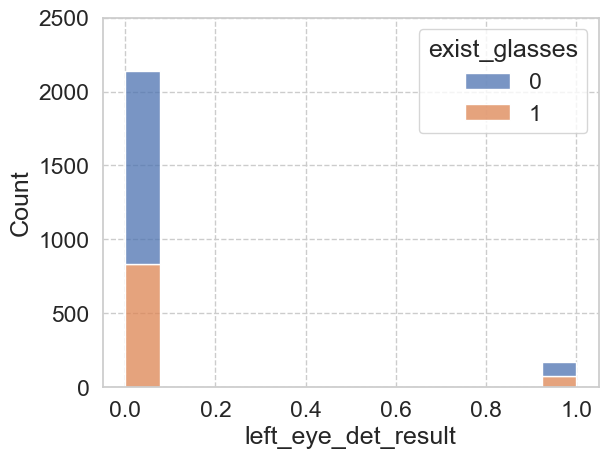

In [72]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(data=result_test_dataset, x='left_eye_det_result', hue='exist_glasses', multiple='stack')
plt.ylim(0, 2500)

(0.0, 2500.0)

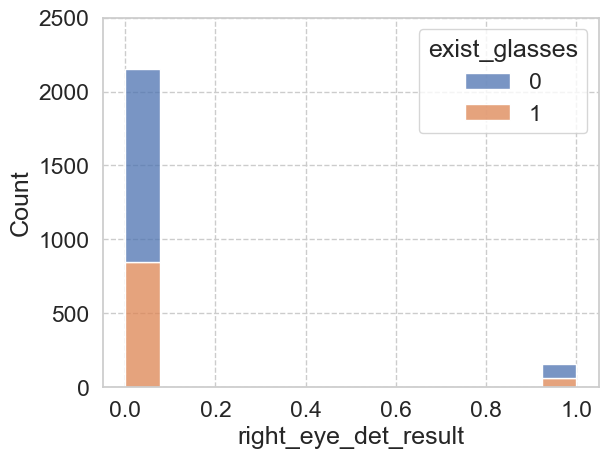

In [73]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(data=result_test_dataset, x='right_eye_det_result', hue='exist_glasses', multiple='stack')
plt.ylim(0, 2500)

In [62]:
confusion_matrix(test_target_data[:, 0], pred_data[:, 0])

array([[1993,   35],
       [ 199,   86]], dtype=int64)

In [63]:
accuracy_score(test_target_data[:, 0], pred_data[:, 0])

0.8988326848249028

In [64]:
precision_score(test_target_data[:, 0], pred_data[:, 0])

0.7107438016528925

In [65]:
recall_score(test_target_data[:, 0], pred_data[:, 0])

0.3017543859649123

In [66]:
f1_score(test_target_data[:, 0], pred_data[:, 0])

0.4236453201970443

In [67]:
confusion_matrix(test_target_data[:, 1], pred_data[:, 1])

array([[2026,   27],
       [ 178,   82]], dtype=int64)

In [74]:
accuracy_score(test_target_data[:, 1], pred_data[:, 1])

0.9113705144833549

In [75]:
precision_score(test_target_data[:, 1], pred_data[:, 1])

0.7522935779816514

In [76]:
recall_score(test_target_data[:, 1], pred_data[:, 1])

0.3153846153846154

In [77]:
f1_score(test_target_data[:, 1], pred_data[:, 1])

0.4444444444444444